In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [6]:
samples = {
    'BICCN_central':'../outputs/gene_cell/MOp_central_10X_ontology.csv',
    'BICCN_periph':'../outputs/gene_cell/MOp_peripheral_ReadZs_gene_ontology.csv',
    'BICCN_punctate':'../outputs/gene_cell/MOp_punctate_10X_ontology.csv',
    'BICCN_radial':'../outputs/gene_cell/MOp_radial_ReadZs_gene_ontology.csv',
    'Brainmap_central':'../outputs/gene_cell/Viz_central.csv',
    'Brainmap_periph':'../outputs/gene_cell/Vizgen_Brainmap_peripheral.csv',
    'Brainmap_punctate':'../outputs/gene_cell/Viz_punctate.csv',
    'Brainmap_radial':'../outputs/gene_cell/Vizgen_Brainmap_radial.csv',
    'CZB_kidney_central':'../outputs/gene_cell/CZB_kidney_central.csv',
    'CZB_kidney_periph':'../outputs/gene_cell/kidney_111921_peripheral.csv',
    'CZB_kidney_punctate':'../outputs/gene_cell/kidney_111921_punctate.csv',
    'CZB_kidney_radial':'../outputs/gene_cell/kidney_111921_radial.csv',
    'CZB_liver_central':'../outputs/gene_cell/CZB_liver_central.csv',
    'CZB_liver_periph':'../outputs/gene_cell/liver_peripheral.csv',
    'CZB_liver_punctate':'../outputs/gene_cell/liver_punctate.csv',
    'CZB_liver_radial':'../outputs/gene_cell/liver_radial.csv',
    'SeqF_central':'../outputs/gene_cell/Seq_central.csv',
    'SeqF_periph':'../outputs/gene_cell/SeqFish_peripheral.csv',
    'SeqF_punctate':'../outputs/gene_cell/Seq_punctate.csv',
    'SeqF_radial':'../outputs/gene_cell/SeqFish_radial.csv',
}

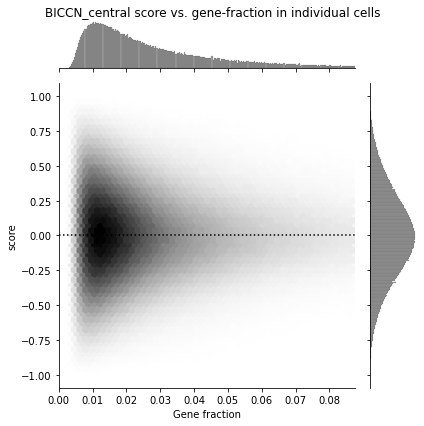

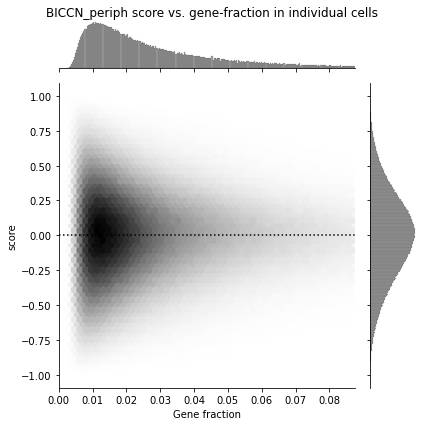

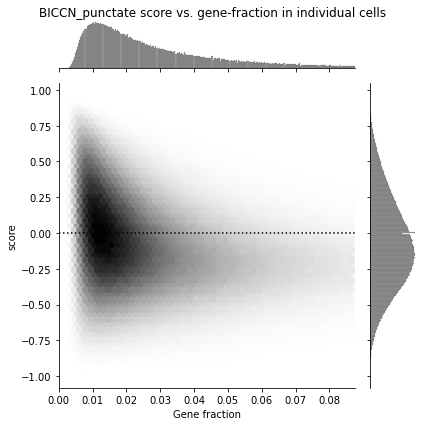

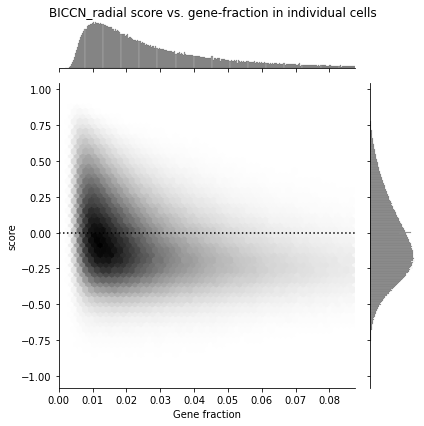

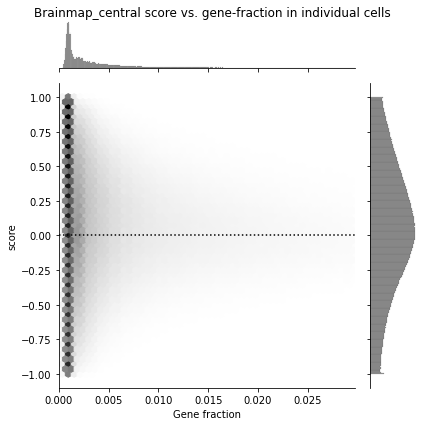

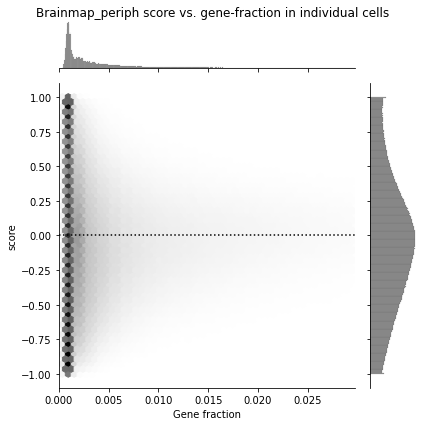

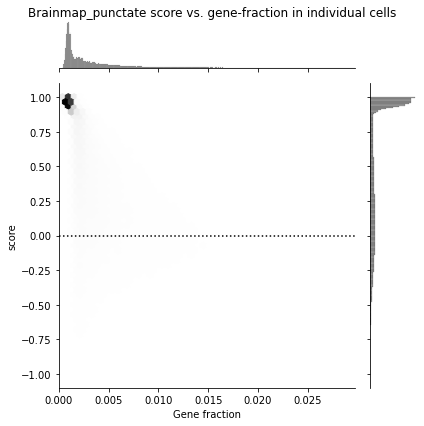

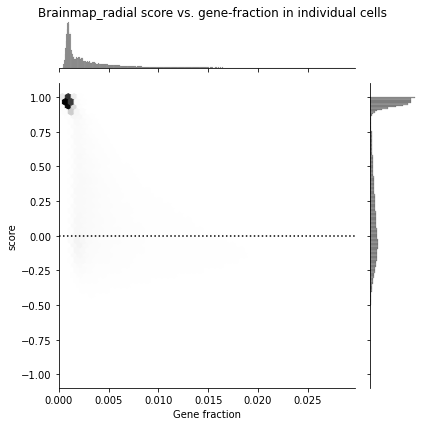

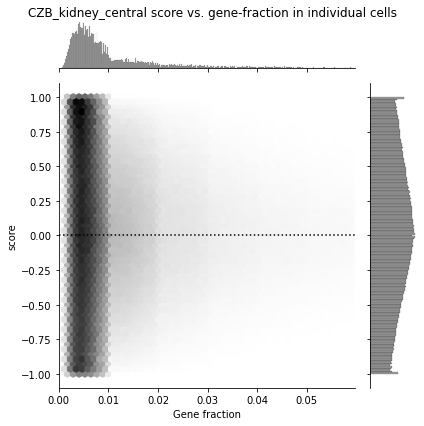

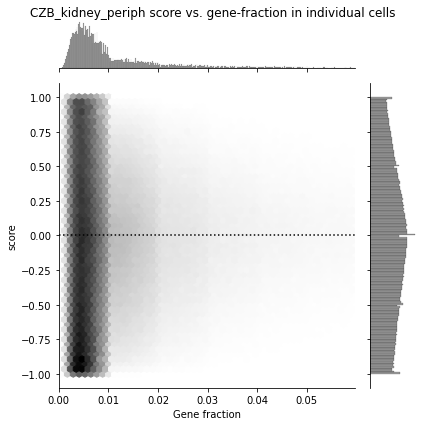

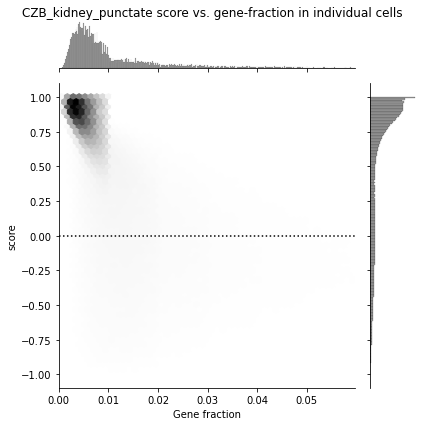

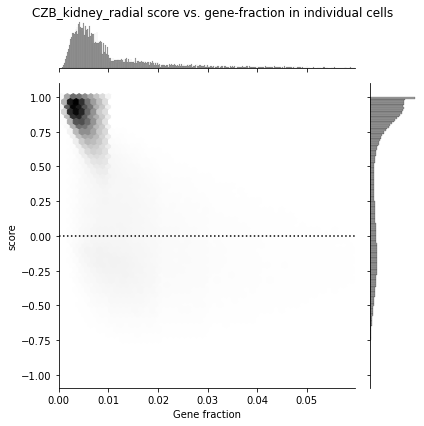

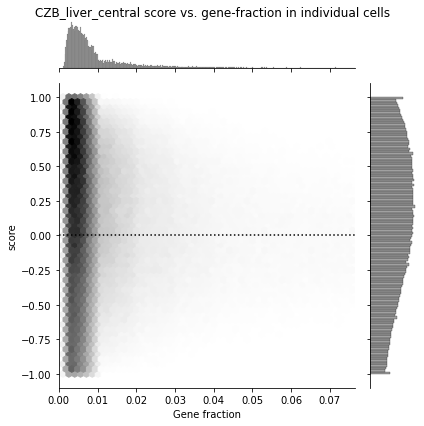

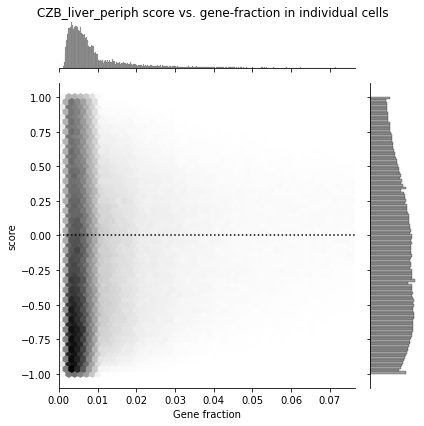

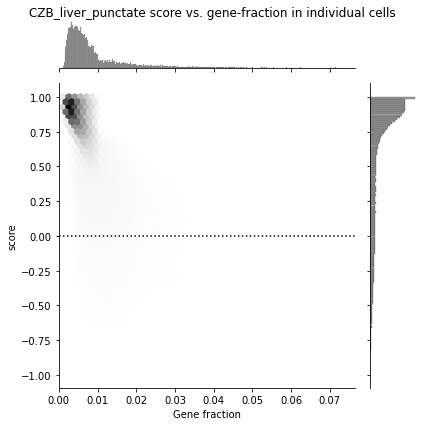

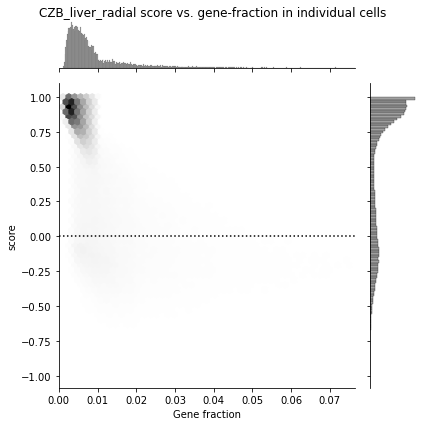

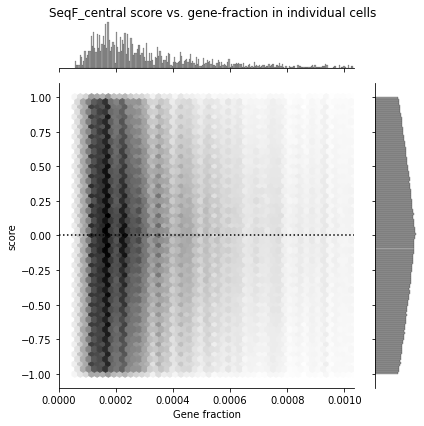

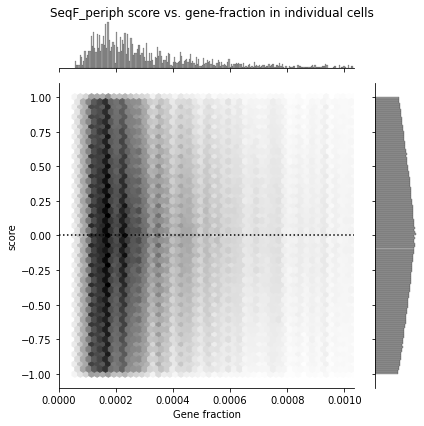

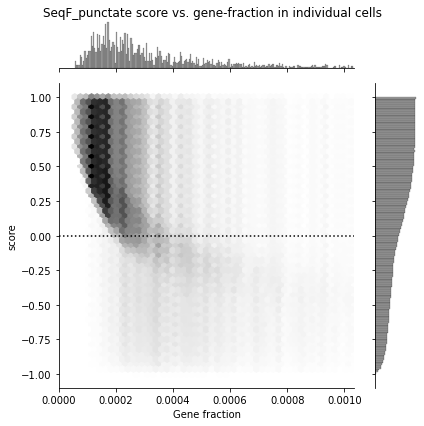

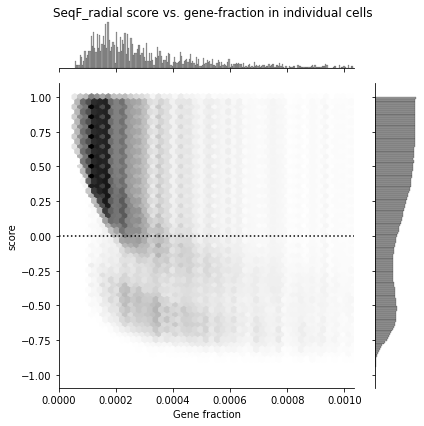

In [64]:
for name,p in samples.items():
    df = pd.read_csv(p)
    df = df.dropna()
    
    df['Gene fraction'] = df['num_gene_spots'].div(df['num_spots'])
    max_frac = df['Gene fraction'].quantile(0.95) #don't plot outliers with very high gene fraction

    p = sns.jointplot(
        x = 'Gene fraction',
        y = 'score',
        kind = 'hex',
        color = 'grey',
        data = df[df['Gene fraction'].le(max_frac)],
    )

    p.ax_joint.axhline(0,linestyle='dotted',color='black')
    p.ax_joint.set_xlim(0,max_frac)
    p.fig.suptitle('{} score vs. gene-fraction in individual cells'.format(name))
    p.fig.tight_layout()
    p.fig.subplots_adjust(top=0.95) # Reduce plot to make room #got code from https://stackoverflow.com/questions/60358228/how-to-set-title-on-seaborn-jointplot

    plt.show()
    plt.close()
    